# Machine Learning Python Exercise 3.1: One-vs-all

In [1]:
import numpy as np # linear algebra
from numpy import loadtxt, where
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import numpy.matlib
from scipy.stats import logistic # sigmoid function
import scipy.optimize as opt
import scipy.io
%matplotlib inline

import os
print(os.listdir("../ex3"))

['.ipynb_checkpoints', 'ex3data1.csv', 'ex3data1.mat', 'ex3data1.txt', 'ex3Theta1weights.csv', 'ex3Theta2weights.csv', 'ex3weights.mat', 'ex3weights.txt', 'Ex3_part_1.ipynb', 'Ex3_part_2.ipynb']


## Instructions

This file  contains code that helps you get started on the exercise. You will need to complete functions in this exercise. The instructions can be found in this notebook, which will load the  program as you complete the exercises. If you need to change the code in a certain section, it will be clearly indicated.

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 Input Images of Digits
num_labels = 10         # 10 labels, from 1 to 10
                        # (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data
We start the exercise by first loading and visualizing the dataset. You will be working with a dataset that contains handwritten digits.

In [3]:
data = scipy.io.loadmat('ex3data1.mat') # load in the data from the provided .mat file

X = data["X"]
y = data["y"]
m = len(y)

theta = scipy.io.loadmat('ex3weights.mat') # load in the weights from the provided .mat file

theta1 = theta['Theta1']
theta2 = theta['Theta2']

# just for clarity the sizes are printed here
print("X is size {}".format(X.shape))
print("y is size {}".format(y.shape))
print("theta1 is size {}".format(theta1.shape))
print("theta2 is size {}".format(theta2.shape))

X is size (5000, 400)
y is size (5000, 1)
theta1 is size (25, 401)
theta2 is size (10, 26)


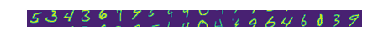

In [4]:
sample = np.random.choice(X.shape[0], 20) # selects a random sample from the data of size 20
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

## Part 2a: Vectorize Logistic Regression

## Complete this logistic regression cost function with regularization

lrCostFunction() computes the cost of using theta as a parameter for regularized logistic regression and the gradient function computes the gradient of the cost w.r.t. the parameter.

Instructions: Compute the cost of a particular choice of theta. You should set J to the cost. 

Then compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta by using the function gradient.

Hint: The computation of the cost function and gradients can be efficiently vectorized. For example, consider the computation $sigmoid(X * theta)$ 

Each row of the resulting matrix will contain the value of the prediction for that example. You can make use of this to vectorize the cost function and gradient computations. 

Compute the gradient separately below the lrCostFunction. This is needed for the optimise function later on.

In [5]:
def lrCostFunction(theta, X, y, lambda_var):
    m = len(y)
    ## Your code
    
    # correct answer
    z = np.dot(X,theta) # X * theta
    h = logistic.cdf(z) # sigmoid(X*theta)
    
    J = 1/m * (np.dot((-y).T, np.log(h))-np.dot((1-y).T,np.log(1-h))) + (lambda_var/(2*m) * np.sum(theta[1:]**2))  
            # 1/m * (-y'*log(h)-(1-y)'*log(1-h)) + regularization
    
    return J

In [6]:
def gradient(theta, X, y, lambda_var):
    ## Your code
    
    # correct answer
    m = len(y)
    z = np.dot(X,theta) # X * theta
    h = logistic.cdf(z).reshape(m,1) # sigmoid(X*theta)
    theta = theta.reshape(theta.shape[0], 1) # make sure theta has the correct dimensions

    grad = (1/m * np.dot(X.T,(h-y))) # 1/m * X' * (h-y)
    grad[1:] = grad[1:] + (lambda_var/m * theta[1:])
    
    return grad

Testing the function.

In [7]:
theta_test = np.array([-2, -1, 1, 2]).reshape((4,1)) 

X_test_right = np.arange(1,16).reshape(3,5).T # generates the test values in an array
X_test_left = np.ones((5,1)) # generates a column of ones
X_test = np.concatenate((X_test_left, X_test_right/10), axis=1) # concatenates the previous two arrays

y_test = np.array([1, 0, 1, 0, 1]).reshape((5,1))
lambda_var_test = 3

cost = lrCostFunction(theta_test, X_test, y_test, lambda_var_test)
grad = gradient(theta_test, X_test, y_test, lambda_var_test)

print('\nCost: {} \n'.format(cost))
print('Expected cost: 2.534819\n')
print('Gradients:\n')
print(' {} '.format(grad))
print('Expected gradients:\n')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')


Cost: [[2.5348194]] 

Expected cost: 2.534819

Gradients:

 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



## Part 2b: One-vs-All Training

## Complete this OneVsAll file

# The following code should train one classifier for each class.

Instructions: You should complete the following code to train num_labels logistic regression classifiers with parameter lambda. 

Hint: For this assignment, we recommend using gradient descent to optimize the cost function. It is okay to use a for-loop (for c in range(1:num_labels+1) to loop over the different classes.

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters, lambda_var):
    for i in range(0, num_iters):
        cost = lrCostFunction(theta, X, y, lambda_var) # Previous cost function is called
        print("Epoch {}, cost: {}".format(i, cost)) 
        g = gradient(theta, X, y, lambda_var) # Previous gradient function is called
        theta = theta - alpha * g # theta is updated using the computed gradient
    return theta

In [9]:
def OneVsAll(X, y, num_labels, lambda_var, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n+1)) # This is the variable where the trained weights are stored
    X = np.column_stack((np.ones((m,1)), X))
    ## Your code
  
    # correct answer
    initial_theta = np.zeros((n+1, 1)).reshape(n+1,1)

    for c in range(1, num_labels+1):
        y_i = np.array([1 if label == c else 0 for label in y]) # an array is generated with the relevant
                                # values (the corresponding ones) so theta can be computed
        y_i = np.reshape(y_i, (m, 1)) # make sure y has the right dimensions
        
        theta = gradientDescent(X, y_i, initial_theta, alpha, num_iters, lambda_var)
        print("Batch {} of 10".format(c))
        all_theta[c-1, :] = theta.ravel()

    return all_theta

In [10]:
lambda_var = 0.1

# Set learning rate and number of iterations per label
alpha = 0.01
num_iters = 1000

all_theta = OneVsAll(X, y, num_labels, lambda_var, alpha, num_iters)

print(all_theta.shape)

Epoch 0, cost: [[0.69314718]]
Epoch 1, cost: [[0.65815709]]
Epoch 2, cost: [[0.62659825]]
Epoch 3, cost: [[0.59811396]]
Epoch 4, cost: [[0.57237616]]
Epoch 5, cost: [[0.5490868]]
Epoch 6, cost: [[0.52797758]]
Epoch 7, cost: [[0.50880872]]
Epoch 8, cost: [[0.49136704]]
Epoch 9, cost: [[0.47546373]]
Epoch 10, cost: [[0.46093201]]
Epoch 11, cost: [[0.44762472]]
Epoch 12, cost: [[0.43541221]]
Epoch 13, cost: [[0.42418015]]
Epoch 14, cost: [[0.4138278]]
Epoch 15, cost: [[0.40426623]]
Epoch 16, cost: [[0.39541689]]
Epoch 17, cost: [[0.3872103]]
Epoch 18, cost: [[0.37958491]]
Epoch 19, cost: [[0.3724861]]
Epoch 20, cost: [[0.36586531]]
Epoch 21, cost: [[0.35967931]]
Epoch 22, cost: [[0.3538895]]
Epoch 23, cost: [[0.34846139]]
Epoch 24, cost: [[0.3433641]]
Epoch 25, cost: [[0.3385699]]
Epoch 26, cost: [[0.33405387]]
Epoch 27, cost: [[0.32979356]]
Epoch 28, cost: [[0.32576871]]
Epoch 29, cost: [[0.32196102]]
Epoch 30, cost: [[0.31835389]]
Epoch 31, cost: [[0.31493228]]
Epoch 32, cost: [[0.31168

Epoch 268, cost: [[0.17056366]]
Epoch 269, cost: [[0.17032623]]
Epoch 270, cost: [[0.17008961]]
Epoch 271, cost: [[0.16985378]]
Epoch 272, cost: [[0.16961874]]
Epoch 273, cost: [[0.16938449]]
Epoch 274, cost: [[0.16915103]]
Epoch 275, cost: [[0.16891834]]
Epoch 276, cost: [[0.16868644]]
Epoch 277, cost: [[0.16845531]]
Epoch 278, cost: [[0.16822495]]
Epoch 279, cost: [[0.16799536]]
Epoch 280, cost: [[0.16776653]]
Epoch 281, cost: [[0.16753846]]
Epoch 282, cost: [[0.16731115]]
Epoch 283, cost: [[0.16708459]]
Epoch 284, cost: [[0.16685878]]
Epoch 285, cost: [[0.16663372]]
Epoch 286, cost: [[0.1664094]]
Epoch 287, cost: [[0.16618582]]
Epoch 288, cost: [[0.16596298]]
Epoch 289, cost: [[0.16574087]]
Epoch 290, cost: [[0.16551949]]
Epoch 291, cost: [[0.16529884]]
Epoch 292, cost: [[0.16507891]]
Epoch 293, cost: [[0.16485971]]
Epoch 294, cost: [[0.16464122]]
Epoch 295, cost: [[0.16442344]]
Epoch 296, cost: [[0.16420638]]
Epoch 297, cost: [[0.16399002]]
Epoch 298, cost: [[0.16377437]]
Epoch 299

Epoch 534, cost: [[0.12742756]]
Epoch 535, cost: [[0.12731855]]
Epoch 536, cost: [[0.12720981]]
Epoch 537, cost: [[0.12710134]]
Epoch 538, cost: [[0.12699314]]
Epoch 539, cost: [[0.12688522]]
Epoch 540, cost: [[0.12677756]]
Epoch 541, cost: [[0.12667017]]
Epoch 542, cost: [[0.12656305]]
Epoch 543, cost: [[0.1264562]]
Epoch 544, cost: [[0.12634961]]
Epoch 545, cost: [[0.12624329]]
Epoch 546, cost: [[0.12613723]]
Epoch 547, cost: [[0.12603143]]
Epoch 548, cost: [[0.1259259]]
Epoch 549, cost: [[0.12582062]]
Epoch 550, cost: [[0.12571561]]
Epoch 551, cost: [[0.12561085]]
Epoch 552, cost: [[0.12550636]]
Epoch 553, cost: [[0.12540212]]
Epoch 554, cost: [[0.12529813]]
Epoch 555, cost: [[0.12519441]]
Epoch 556, cost: [[0.12509093]]
Epoch 557, cost: [[0.12498771]]
Epoch 558, cost: [[0.12488475]]
Epoch 559, cost: [[0.12478203]]
Epoch 560, cost: [[0.12467956]]
Epoch 561, cost: [[0.12457735]]
Epoch 562, cost: [[0.12447538]]
Epoch 563, cost: [[0.12437367]]
Epoch 564, cost: [[0.12427219]]
Epoch 565,

Epoch 799, cost: [[0.10575518]]
Epoch 800, cost: [[0.10569397]]
Epoch 801, cost: [[0.10563287]]
Epoch 802, cost: [[0.10557188]]
Epoch 803, cost: [[0.10551101]]
Epoch 804, cost: [[0.10545025]]
Epoch 805, cost: [[0.10538961]]
Epoch 806, cost: [[0.10532908]]
Epoch 807, cost: [[0.10526867]]
Epoch 808, cost: [[0.10520837]]
Epoch 809, cost: [[0.10514818]]
Epoch 810, cost: [[0.1050881]]
Epoch 811, cost: [[0.10502813]]
Epoch 812, cost: [[0.10496828]]
Epoch 813, cost: [[0.10490854]]
Epoch 814, cost: [[0.10484891]]
Epoch 815, cost: [[0.10478939]]
Epoch 816, cost: [[0.10472998]]
Epoch 817, cost: [[0.10467068]]
Epoch 818, cost: [[0.10461149]]
Epoch 819, cost: [[0.1045524]]
Epoch 820, cost: [[0.10449343]]
Epoch 821, cost: [[0.10443457]]
Epoch 822, cost: [[0.10437582]]
Epoch 823, cost: [[0.10431717]]
Epoch 824, cost: [[0.10425863]]
Epoch 825, cost: [[0.1042002]]
Epoch 826, cost: [[0.10414188]]
Epoch 827, cost: [[0.10408366]]
Epoch 828, cost: [[0.10402555]]
Epoch 829, cost: [[0.10396755]]
Epoch 830, 

Epoch 67, cost: [[0.33232876]]
Epoch 68, cost: [[0.33161924]]
Epoch 69, cost: [[0.33092437]]
Epoch 70, cost: [[0.33024345]]
Epoch 71, cost: [[0.32957581]]
Epoch 72, cost: [[0.32892085]]
Epoch 73, cost: [[0.32827797]]
Epoch 74, cost: [[0.32764661]]
Epoch 75, cost: [[0.32702626]]
Epoch 76, cost: [[0.32641642]]
Epoch 77, cost: [[0.32581661]]
Epoch 78, cost: [[0.32522641]]
Epoch 79, cost: [[0.32464539]]
Epoch 80, cost: [[0.32407315]]
Epoch 81, cost: [[0.32350933]]
Epoch 82, cost: [[0.32295356]]
Epoch 83, cost: [[0.32240551]]
Epoch 84, cost: [[0.32186486]]
Epoch 85, cost: [[0.32133131]]
Epoch 86, cost: [[0.32080457]]
Epoch 87, cost: [[0.32028437]]
Epoch 88, cost: [[0.31977045]]
Epoch 89, cost: [[0.31926257]]
Epoch 90, cost: [[0.31876049]]
Epoch 91, cost: [[0.31826398]]
Epoch 92, cost: [[0.31777285]]
Epoch 93, cost: [[0.31728689]]
Epoch 94, cost: [[0.3168059]]
Epoch 95, cost: [[0.31632971]]
Epoch 96, cost: [[0.31585814]]
Epoch 97, cost: [[0.31539103]]
Epoch 98, cost: [[0.31492823]]
Epoch 99,

Epoch 342, cost: [[0.24316677]]
Epoch 343, cost: [[0.24296185]]
Epoch 344, cost: [[0.24275745]]
Epoch 345, cost: [[0.24255358]]
Epoch 346, cost: [[0.24235023]]
Epoch 347, cost: [[0.2421474]]
Epoch 348, cost: [[0.24194508]]
Epoch 349, cost: [[0.24174329]]
Epoch 350, cost: [[0.241542]]
Epoch 351, cost: [[0.24134124]]
Epoch 352, cost: [[0.24114098]]
Epoch 353, cost: [[0.24094124]]
Epoch 354, cost: [[0.240742]]
Epoch 355, cost: [[0.24054327]]
Epoch 356, cost: [[0.24034505]]
Epoch 357, cost: [[0.24014733]]
Epoch 358, cost: [[0.23995011]]
Epoch 359, cost: [[0.23975339]]
Epoch 360, cost: [[0.23955717]]
Epoch 361, cost: [[0.23936145]]
Epoch 362, cost: [[0.23916623]]
Epoch 363, cost: [[0.2389715]]
Epoch 364, cost: [[0.23877727]]
Epoch 365, cost: [[0.23858352]]
Epoch 366, cost: [[0.23839027]]
Epoch 367, cost: [[0.2381975]]
Epoch 368, cost: [[0.23800522]]
Epoch 369, cost: [[0.23781343]]
Epoch 370, cost: [[0.23762212]]
Epoch 371, cost: [[0.23743129]]
Epoch 372, cost: [[0.23724094]]
Epoch 373, cost

Epoch 602, cost: [[0.20358706]]
Epoch 603, cost: [[0.20347521]]
Epoch 604, cost: [[0.20336359]]
Epoch 605, cost: [[0.2032522]]
Epoch 606, cost: [[0.20314104]]
Epoch 607, cost: [[0.2030301]]
Epoch 608, cost: [[0.2029194]]
Epoch 609, cost: [[0.20280892]]
Epoch 610, cost: [[0.20269867]]
Epoch 611, cost: [[0.20258865]]
Epoch 612, cost: [[0.20247885]]
Epoch 613, cost: [[0.20236927]]
Epoch 614, cost: [[0.20225992]]
Epoch 615, cost: [[0.2021508]]
Epoch 616, cost: [[0.2020419]]
Epoch 617, cost: [[0.20193321]]
Epoch 618, cost: [[0.20182475]]
Epoch 619, cost: [[0.20171652]]
Epoch 620, cost: [[0.2016085]]
Epoch 621, cost: [[0.2015007]]
Epoch 622, cost: [[0.20139312]]
Epoch 623, cost: [[0.20128575]]
Epoch 624, cost: [[0.20117861]]
Epoch 625, cost: [[0.20107168]]
Epoch 626, cost: [[0.20096497]]
Epoch 627, cost: [[0.20085847]]
Epoch 628, cost: [[0.20075219]]
Epoch 629, cost: [[0.20064612]]
Epoch 630, cost: [[0.20054027]]
Epoch 631, cost: [[0.20043463]]
Epoch 632, cost: [[0.2003292]]
Epoch 633, cost:

Epoch 863, cost: [[0.18058209]]
Epoch 864, cost: [[0.18051271]]
Epoch 865, cost: [[0.18044345]]
Epoch 866, cost: [[0.18037429]]
Epoch 867, cost: [[0.18030525]]
Epoch 868, cost: [[0.18023632]]
Epoch 869, cost: [[0.1801675]]
Epoch 870, cost: [[0.18009879]]
Epoch 871, cost: [[0.18003019]]
Epoch 872, cost: [[0.1799617]]
Epoch 873, cost: [[0.17989332]]
Epoch 874, cost: [[0.17982505]]
Epoch 875, cost: [[0.17975689]]
Epoch 876, cost: [[0.17968883]]
Epoch 877, cost: [[0.17962089]]
Epoch 878, cost: [[0.17955305]]
Epoch 879, cost: [[0.17948533]]
Epoch 880, cost: [[0.1794177]]
Epoch 881, cost: [[0.17935019]]
Epoch 882, cost: [[0.17928279]]
Epoch 883, cost: [[0.17921549]]
Epoch 884, cost: [[0.1791483]]
Epoch 885, cost: [[0.17908121]]
Epoch 886, cost: [[0.17901423]]
Epoch 887, cost: [[0.17894736]]
Epoch 888, cost: [[0.17888059]]
Epoch 889, cost: [[0.17881393]]
Epoch 890, cost: [[0.17874738]]
Epoch 891, cost: [[0.17868092]]
Epoch 892, cost: [[0.17861458]]
Epoch 893, cost: [[0.17854833]]
Epoch 894, c

Epoch 131, cost: [[0.29966639]]
Epoch 132, cost: [[0.29927723]]
Epoch 133, cost: [[0.29888986]]
Epoch 134, cost: [[0.29850425]]
Epoch 135, cost: [[0.29812036]]
Epoch 136, cost: [[0.29773817]]
Epoch 137, cost: [[0.29735764]]
Epoch 138, cost: [[0.29697876]]
Epoch 139, cost: [[0.29660148]]
Epoch 140, cost: [[0.2962258]]
Epoch 141, cost: [[0.29585167]]
Epoch 142, cost: [[0.29547909]]
Epoch 143, cost: [[0.29510803]]
Epoch 144, cost: [[0.29473846]]
Epoch 145, cost: [[0.29437036]]
Epoch 146, cost: [[0.29400373]]
Epoch 147, cost: [[0.29363852]]
Epoch 148, cost: [[0.29327474]]
Epoch 149, cost: [[0.29291235]]
Epoch 150, cost: [[0.29255134]]
Epoch 151, cost: [[0.2921917]]
Epoch 152, cost: [[0.29183341]]
Epoch 153, cost: [[0.29147644]]
Epoch 154, cost: [[0.2911208]]
Epoch 155, cost: [[0.29076646]]
Epoch 156, cost: [[0.2904134]]
Epoch 157, cost: [[0.29006163]]
Epoch 158, cost: [[0.28971111]]
Epoch 159, cost: [[0.28936184]]
Epoch 160, cost: [[0.28901381]]
Epoch 161, cost: [[0.288667]]
Epoch 162, cos

Epoch 400, cost: [[0.22979819]]
Epoch 401, cost: [[0.22962589]]
Epoch 402, cost: [[0.22945404]]
Epoch 403, cost: [[0.22928264]]
Epoch 404, cost: [[0.2291117]]
Epoch 405, cost: [[0.2289412]]
Epoch 406, cost: [[0.22877115]]
Epoch 407, cost: [[0.22860154]]
Epoch 408, cost: [[0.22843238]]
Epoch 409, cost: [[0.22826365]]
Epoch 410, cost: [[0.22809537]]
Epoch 411, cost: [[0.22792753]]
Epoch 412, cost: [[0.22776013]]
Epoch 413, cost: [[0.22759316]]
Epoch 414, cost: [[0.22742662]]
Epoch 415, cost: [[0.22726052]]
Epoch 416, cost: [[0.22709485]]
Epoch 417, cost: [[0.22692961]]
Epoch 418, cost: [[0.2267648]]
Epoch 419, cost: [[0.22660041]]
Epoch 420, cost: [[0.22643645]]
Epoch 421, cost: [[0.22627291]]
Epoch 422, cost: [[0.22610979]]
Epoch 423, cost: [[0.2259471]]
Epoch 424, cost: [[0.22578482]]
Epoch 425, cost: [[0.22562296]]
Epoch 426, cost: [[0.22546152]]
Epoch 427, cost: [[0.22530049]]
Epoch 428, cost: [[0.22513988]]
Epoch 429, cost: [[0.22497967]]
Epoch 430, cost: [[0.22481988]]
Epoch 431, c

Epoch 680, cost: [[0.1946958]]
Epoch 681, cost: [[0.19460505]]
Epoch 682, cost: [[0.19451449]]
Epoch 683, cost: [[0.19442411]]
Epoch 684, cost: [[0.1943339]]
Epoch 685, cost: [[0.19424387]]
Epoch 686, cost: [[0.19415402]]
Epoch 687, cost: [[0.19406434]]
Epoch 688, cost: [[0.19397483]]
Epoch 689, cost: [[0.1938855]]
Epoch 690, cost: [[0.19379635]]
Epoch 691, cost: [[0.19370737]]
Epoch 692, cost: [[0.19361856]]
Epoch 693, cost: [[0.19352992]]
Epoch 694, cost: [[0.19344145]]
Epoch 695, cost: [[0.19335316]]
Epoch 696, cost: [[0.19326504]]
Epoch 697, cost: [[0.19317709]]
Epoch 698, cost: [[0.19308931]]
Epoch 699, cost: [[0.19300169]]
Epoch 700, cost: [[0.19291425]]
Epoch 701, cost: [[0.19282697]]
Epoch 702, cost: [[0.19273987]]
Epoch 703, cost: [[0.19265293]]
Epoch 704, cost: [[0.19256615]]
Epoch 705, cost: [[0.19247955]]
Epoch 706, cost: [[0.1923931]]
Epoch 707, cost: [[0.19230683]]
Epoch 708, cost: [[0.19222072]]
Epoch 709, cost: [[0.19213477]]
Epoch 710, cost: [[0.19204899]]
Epoch 711, c

Epoch 946, cost: [[0.17551402]]
Epoch 947, cost: [[0.17545667]]
Epoch 948, cost: [[0.17539939]]
Epoch 949, cost: [[0.17534221]]
Epoch 950, cost: [[0.17528511]]
Epoch 951, cost: [[0.1752281]]
Epoch 952, cost: [[0.17517117]]
Epoch 953, cost: [[0.17511433]]
Epoch 954, cost: [[0.17505758]]
Epoch 955, cost: [[0.17500091]]
Epoch 956, cost: [[0.17494432]]
Epoch 957, cost: [[0.17488782]]
Epoch 958, cost: [[0.17483141]]
Epoch 959, cost: [[0.17477508]]
Epoch 960, cost: [[0.17471883]]
Epoch 961, cost: [[0.17466266]]
Epoch 962, cost: [[0.17460659]]
Epoch 963, cost: [[0.17455059]]
Epoch 964, cost: [[0.17449468]]
Epoch 965, cost: [[0.17443885]]
Epoch 966, cost: [[0.1743831]]
Epoch 967, cost: [[0.17432744]]
Epoch 968, cost: [[0.17427185]]
Epoch 969, cost: [[0.17421636]]
Epoch 970, cost: [[0.17416094]]
Epoch 971, cost: [[0.1741056]]
Epoch 972, cost: [[0.17405035]]
Epoch 973, cost: [[0.17399518]]
Epoch 974, cost: [[0.17394009]]
Epoch 975, cost: [[0.17388508]]
Epoch 976, cost: [[0.17383015]]
Epoch 977, 

Epoch 207, cost: [[0.24976378]]
Epoch 208, cost: [[0.24948942]]
Epoch 209, cost: [[0.24921587]]
Epoch 210, cost: [[0.24894313]]
Epoch 211, cost: [[0.24867121]]
Epoch 212, cost: [[0.24840009]]
Epoch 213, cost: [[0.24812978]]
Epoch 214, cost: [[0.24786026]]
Epoch 215, cost: [[0.24759154]]
Epoch 216, cost: [[0.2473236]]
Epoch 217, cost: [[0.24705646]]
Epoch 218, cost: [[0.24679009]]
Epoch 219, cost: [[0.2465245]]
Epoch 220, cost: [[0.24625969]]
Epoch 221, cost: [[0.24599564]]
Epoch 222, cost: [[0.24573236]]
Epoch 223, cost: [[0.24546985]]
Epoch 224, cost: [[0.24520809]]
Epoch 225, cost: [[0.24494709]]
Epoch 226, cost: [[0.24468684]]
Epoch 227, cost: [[0.24442734]]
Epoch 228, cost: [[0.24416858]]
Epoch 229, cost: [[0.24391057]]
Epoch 230, cost: [[0.2436533]]
Epoch 231, cost: [[0.24339676]]
Epoch 232, cost: [[0.24314095]]
Epoch 233, cost: [[0.24288587]]
Epoch 234, cost: [[0.24263152]]
Epoch 235, cost: [[0.24237789]]
Epoch 236, cost: [[0.24212498]]
Epoch 237, cost: [[0.24187278]]
Epoch 238, 

Epoch 474, cost: [[0.19754892]]
Epoch 475, cost: [[0.19741157]]
Epoch 476, cost: [[0.19727453]]
Epoch 477, cost: [[0.1971378]]
Epoch 478, cost: [[0.19700139]]
Epoch 479, cost: [[0.19686528]]
Epoch 480, cost: [[0.19672949]]
Epoch 481, cost: [[0.196594]]
Epoch 482, cost: [[0.19645883]]
Epoch 483, cost: [[0.19632396]]
Epoch 484, cost: [[0.19618939]]
Epoch 485, cost: [[0.19605513]]
Epoch 486, cost: [[0.19592117]]
Epoch 487, cost: [[0.19578752]]
Epoch 488, cost: [[0.19565417]]
Epoch 489, cost: [[0.19552111]]
Epoch 490, cost: [[0.19538836]]
Epoch 491, cost: [[0.19525591]]
Epoch 492, cost: [[0.19512375]]
Epoch 493, cost: [[0.19499189]]
Epoch 494, cost: [[0.19486033]]
Epoch 495, cost: [[0.19472906]]
Epoch 496, cost: [[0.19459809]]
Epoch 497, cost: [[0.19446741]]
Epoch 498, cost: [[0.19433702]]
Epoch 499, cost: [[0.19420692]]
Epoch 500, cost: [[0.19407711]]
Epoch 501, cost: [[0.1939476]]
Epoch 502, cost: [[0.19381837]]
Epoch 503, cost: [[0.19368942]]
Epoch 504, cost: [[0.19356077]]
Epoch 505, c

Epoch 743, cost: [[0.16930468]]
Epoch 744, cost: [[0.16922457]]
Epoch 745, cost: [[0.16914461]]
Epoch 746, cost: [[0.16906479]]
Epoch 747, cost: [[0.1689851]]
Epoch 748, cost: [[0.16890555]]
Epoch 749, cost: [[0.16882615]]
Epoch 750, cost: [[0.16874688]]
Epoch 751, cost: [[0.16866774]]
Epoch 752, cost: [[0.16858875]]
Epoch 753, cost: [[0.16850989]]
Epoch 754, cost: [[0.16843117]]
Epoch 755, cost: [[0.16835258]]
Epoch 756, cost: [[0.16827413]]
Epoch 757, cost: [[0.16819581]]
Epoch 758, cost: [[0.16811763]]
Epoch 759, cost: [[0.16803959]]
Epoch 760, cost: [[0.16796168]]
Epoch 761, cost: [[0.1678839]]
Epoch 762, cost: [[0.16780626]]
Epoch 763, cost: [[0.16772875]]
Epoch 764, cost: [[0.16765137]]
Epoch 765, cost: [[0.16757412]]
Epoch 766, cost: [[0.16749701]]
Epoch 767, cost: [[0.16742003]]
Epoch 768, cost: [[0.16734318]]
Epoch 769, cost: [[0.16726646]]
Epoch 770, cost: [[0.16718987]]
Epoch 771, cost: [[0.16711342]]
Epoch 772, cost: [[0.16703709]]
Epoch 773, cost: [[0.16696089]]
Epoch 774,

Epoch 2, cost: [[0.63524578]]
Epoch 3, cost: [[0.61047061]]
Epoch 4, cost: [[0.58809319]]
Epoch 5, cost: [[0.56785666]]
Epoch 6, cost: [[0.5495298]]
Epoch 7, cost: [[0.53290575]]
Epoch 8, cost: [[0.51780028]]
Epoch 9, cost: [[0.50404985]]
Epoch 10, cost: [[0.49150961]]
Epoch 11, cost: [[0.48005146]]
Epoch 12, cost: [[0.46956216]]
Epoch 13, cost: [[0.45994163]]
Epoch 14, cost: [[0.45110141]]
Epoch 15, cost: [[0.44296321]]
Epoch 16, cost: [[0.43545771]]
Epoch 17, cost: [[0.42852347]]
Epoch 18, cost: [[0.4221059]]
Epoch 19, cost: [[0.41615649]]
Epoch 20, cost: [[0.41063202]]
Epoch 21, cost: [[0.40549395]]
Epoch 22, cost: [[0.40070782]]
Epoch 23, cost: [[0.39624281]]
Epoch 24, cost: [[0.39207124]]
Epoch 25, cost: [[0.38816829]]
Epoch 26, cost: [[0.3845116]]
Epoch 27, cost: [[0.38108103]]
Epoch 28, cost: [[0.37785838]]
Epoch 29, cost: [[0.37482719]]
Epoch 30, cost: [[0.37197257]]
Epoch 31, cost: [[0.36928098]]
Epoch 32, cost: [[0.36674013]]
Epoch 33, cost: [[0.36433885]]
Epoch 34, cost: [[0

Epoch 275, cost: [[0.27494787]]
Epoch 276, cost: [[0.27478897]]
Epoch 277, cost: [[0.27463037]]
Epoch 278, cost: [[0.27447207]]
Epoch 279, cost: [[0.27431406]]
Epoch 280, cost: [[0.27415635]]
Epoch 281, cost: [[0.27399893]]
Epoch 282, cost: [[0.27384181]]
Epoch 283, cost: [[0.27368498]]
Epoch 284, cost: [[0.27352844]]
Epoch 285, cost: [[0.2733722]]
Epoch 286, cost: [[0.27321625]]
Epoch 287, cost: [[0.27306058]]
Epoch 288, cost: [[0.27290521]]
Epoch 289, cost: [[0.27275013]]
Epoch 290, cost: [[0.27259533]]
Epoch 291, cost: [[0.27244082]]
Epoch 292, cost: [[0.2722866]]
Epoch 293, cost: [[0.27213266]]
Epoch 294, cost: [[0.271979]]
Epoch 295, cost: [[0.27182563]]
Epoch 296, cost: [[0.27167255]]
Epoch 297, cost: [[0.27151974]]
Epoch 298, cost: [[0.27136722]]
Epoch 299, cost: [[0.27121497]]
Epoch 300, cost: [[0.27106301]]
Epoch 301, cost: [[0.27091133]]
Epoch 302, cost: [[0.27075992]]
Epoch 303, cost: [[0.27060879]]
Epoch 304, cost: [[0.27045794]]
Epoch 305, cost: [[0.27030737]]
Epoch 306, c

Epoch 534, cost: [[0.24187102]]
Epoch 535, cost: [[0.24176871]]
Epoch 536, cost: [[0.24166656]]
Epoch 537, cost: [[0.24156457]]
Epoch 538, cost: [[0.24146273]]
Epoch 539, cost: [[0.24136105]]
Epoch 540, cost: [[0.24125952]]
Epoch 541, cost: [[0.24115815]]
Epoch 542, cost: [[0.24105694]]
Epoch 543, cost: [[0.24095587]]
Epoch 544, cost: [[0.24085496]]
Epoch 545, cost: [[0.24075421]]
Epoch 546, cost: [[0.24065361]]
Epoch 547, cost: [[0.24055316]]
Epoch 548, cost: [[0.24045286]]
Epoch 549, cost: [[0.24035272]]
Epoch 550, cost: [[0.24025272]]
Epoch 551, cost: [[0.24015288]]
Epoch 552, cost: [[0.24005319]]
Epoch 553, cost: [[0.23995365]]
Epoch 554, cost: [[0.23985426]]
Epoch 555, cost: [[0.23975502]]
Epoch 556, cost: [[0.23965593]]
Epoch 557, cost: [[0.23955699]]
Epoch 558, cost: [[0.2394582]]
Epoch 559, cost: [[0.23935956]]
Epoch 560, cost: [[0.23926106]]
Epoch 561, cost: [[0.23916272]]
Epoch 562, cost: [[0.23906452]]
Epoch 563, cost: [[0.23896646]]
Epoch 564, cost: [[0.23886856]]
Epoch 565

Epoch 799, cost: [[0.21930265]]
Epoch 800, cost: [[0.21923176]]
Epoch 801, cost: [[0.21916095]]
Epoch 802, cost: [[0.21909024]]
Epoch 803, cost: [[0.21901961]]
Epoch 804, cost: [[0.21894907]]
Epoch 805, cost: [[0.21887862]]
Epoch 806, cost: [[0.21880826]]
Epoch 807, cost: [[0.21873798]]
Epoch 808, cost: [[0.21866779]]
Epoch 809, cost: [[0.21859769]]
Epoch 810, cost: [[0.21852767]]
Epoch 811, cost: [[0.21845774]]
Epoch 812, cost: [[0.2183879]]
Epoch 813, cost: [[0.21831814]]
Epoch 814, cost: [[0.21824847]]
Epoch 815, cost: [[0.21817889]]
Epoch 816, cost: [[0.21810939]]
Epoch 817, cost: [[0.21803998]]
Epoch 818, cost: [[0.21797066]]
Epoch 819, cost: [[0.21790141]]
Epoch 820, cost: [[0.21783226]]
Epoch 821, cost: [[0.21776319]]
Epoch 822, cost: [[0.2176942]]
Epoch 823, cost: [[0.2176253]]
Epoch 824, cost: [[0.21755648]]
Epoch 825, cost: [[0.21748775]]
Epoch 826, cost: [[0.2174191]]
Epoch 827, cost: [[0.21735054]]
Epoch 828, cost: [[0.21728206]]
Epoch 829, cost: [[0.21721366]]
Epoch 830, c

Epoch 69, cost: [[0.31500434]]
Epoch 70, cost: [[0.31418869]]
Epoch 71, cost: [[0.31338712]]
Epoch 72, cost: [[0.312599]]
Epoch 73, cost: [[0.31182371]]
Epoch 74, cost: [[0.3110607]]
Epoch 75, cost: [[0.31030943]]
Epoch 76, cost: [[0.30956939]]
Epoch 77, cost: [[0.3088401]]
Epoch 78, cost: [[0.3081211]]
Epoch 79, cost: [[0.30741197]]
Epoch 80, cost: [[0.3067123]]
Epoch 81, cost: [[0.30602171]]
Epoch 82, cost: [[0.30533983]]
Epoch 83, cost: [[0.30466631]]
Epoch 84, cost: [[0.30400083]]
Epoch 85, cost: [[0.30334307]]
Epoch 86, cost: [[0.30269274]]
Epoch 87, cost: [[0.30204956]]
Epoch 88, cost: [[0.30141327]]
Epoch 89, cost: [[0.3007836]]
Epoch 90, cost: [[0.30016032]]
Epoch 91, cost: [[0.2995432]]
Epoch 92, cost: [[0.29893202]]
Epoch 93, cost: [[0.29832658]]
Epoch 94, cost: [[0.29772667]]
Epoch 95, cost: [[0.29713211]]
Epoch 96, cost: [[0.29654273]]
Epoch 97, cost: [[0.29595835]]
Epoch 98, cost: [[0.2953788]]
Epoch 99, cost: [[0.29480394]]
Epoch 100, cost: [[0.29423362]]
Epoch 101, cost:

Epoch 339, cost: [[0.20680775]]
Epoch 340, cost: [[0.2065612]]
Epoch 341, cost: [[0.20631537]]
Epoch 342, cost: [[0.20607024]]
Epoch 343, cost: [[0.20582582]]
Epoch 344, cost: [[0.20558211]]
Epoch 345, cost: [[0.2053391]]
Epoch 346, cost: [[0.2050968]]
Epoch 347, cost: [[0.20485519]]
Epoch 348, cost: [[0.20461427]]
Epoch 349, cost: [[0.20437405]]
Epoch 350, cost: [[0.20413452]]
Epoch 351, cost: [[0.20389568]]
Epoch 352, cost: [[0.20365753]]
Epoch 353, cost: [[0.20342006]]
Epoch 354, cost: [[0.20318327]]
Epoch 355, cost: [[0.20294715]]
Epoch 356, cost: [[0.20271172]]
Epoch 357, cost: [[0.20247696]]
Epoch 358, cost: [[0.20224287]]
Epoch 359, cost: [[0.20200945]]
Epoch 360, cost: [[0.20177669]]
Epoch 361, cost: [[0.2015446]]
Epoch 362, cost: [[0.20131318]]
Epoch 363, cost: [[0.20108241]]
Epoch 364, cost: [[0.2008523]]
Epoch 365, cost: [[0.20062284]]
Epoch 366, cost: [[0.20039404]]
Epoch 367, cost: [[0.20016589]]
Epoch 368, cost: [[0.19993838]]
Epoch 369, cost: [[0.19971152]]
Epoch 370, co

Epoch 605, cost: [[0.16003109]]
Epoch 606, cost: [[0.15990742]]
Epoch 607, cost: [[0.15978402]]
Epoch 608, cost: [[0.15966091]]
Epoch 609, cost: [[0.15953807]]
Epoch 610, cost: [[0.15941552]]
Epoch 611, cost: [[0.15929324]]
Epoch 612, cost: [[0.15917123]]
Epoch 613, cost: [[0.1590495]]
Epoch 614, cost: [[0.15892805]]
Epoch 615, cost: [[0.15880687]]
Epoch 616, cost: [[0.15868596]]
Epoch 617, cost: [[0.15856532]]
Epoch 618, cost: [[0.15844495]]
Epoch 619, cost: [[0.15832486]]
Epoch 620, cost: [[0.15820503]]
Epoch 621, cost: [[0.15808547]]
Epoch 622, cost: [[0.15796618]]
Epoch 623, cost: [[0.15784715]]
Epoch 624, cost: [[0.15772839]]
Epoch 625, cost: [[0.15760989]]
Epoch 626, cost: [[0.15749166]]
Epoch 627, cost: [[0.15737369]]
Epoch 628, cost: [[0.15725598]]
Epoch 629, cost: [[0.15713854]]
Epoch 630, cost: [[0.15702135]]
Epoch 631, cost: [[0.15690443]]
Epoch 632, cost: [[0.15678776]]
Epoch 633, cost: [[0.15667135]]
Epoch 634, cost: [[0.1565552]]
Epoch 635, cost: [[0.1564393]]
Epoch 636, 

Epoch 865, cost: [[0.13521466]]
Epoch 866, cost: [[0.13514118]]
Epoch 867, cost: [[0.13506784]]
Epoch 868, cost: [[0.13499462]]
Epoch 869, cost: [[0.13492153]]
Epoch 870, cost: [[0.13484856]]
Epoch 871, cost: [[0.13477573]]
Epoch 872, cost: [[0.13470302]]
Epoch 873, cost: [[0.13463044]]
Epoch 874, cost: [[0.13455799]]
Epoch 875, cost: [[0.13448566]]
Epoch 876, cost: [[0.13441346]]
Epoch 877, cost: [[0.13434139]]
Epoch 878, cost: [[0.13426944]]
Epoch 879, cost: [[0.13419762]]
Epoch 880, cost: [[0.13412592]]
Epoch 881, cost: [[0.13405435]]
Epoch 882, cost: [[0.1339829]]
Epoch 883, cost: [[0.13391158]]
Epoch 884, cost: [[0.13384037]]
Epoch 885, cost: [[0.1337693]]
Epoch 886, cost: [[0.13369834]]
Epoch 887, cost: [[0.13362751]]
Epoch 888, cost: [[0.1335568]]
Epoch 889, cost: [[0.13348621]]
Epoch 890, cost: [[0.13341574]]
Epoch 891, cost: [[0.1333454]]
Epoch 892, cost: [[0.13327518]]
Epoch 893, cost: [[0.13320507]]
Epoch 894, cost: [[0.13313509]]
Epoch 895, cost: [[0.13306523]]
Epoch 896, c

Epoch 146, cost: [[0.25415781]]
Epoch 147, cost: [[0.25376937]]
Epoch 148, cost: [[0.2533826]]
Epoch 149, cost: [[0.25299747]]
Epoch 150, cost: [[0.25261397]]
Epoch 151, cost: [[0.25223207]]
Epoch 152, cost: [[0.25185175]]
Epoch 153, cost: [[0.25147298]]
Epoch 154, cost: [[0.25109576]]
Epoch 155, cost: [[0.25072004]]
Epoch 156, cost: [[0.25034583]]
Epoch 157, cost: [[0.24997309]]
Epoch 158, cost: [[0.24960182]]
Epoch 159, cost: [[0.24923199]]
Epoch 160, cost: [[0.24886358]]
Epoch 161, cost: [[0.24849658]]
Epoch 162, cost: [[0.24813098]]
Epoch 163, cost: [[0.24776676]]
Epoch 164, cost: [[0.2474039]]
Epoch 165, cost: [[0.2470424]]
Epoch 166, cost: [[0.24668222]]
Epoch 167, cost: [[0.24632337]]
Epoch 168, cost: [[0.24596583]]
Epoch 169, cost: [[0.24560958]]
Epoch 170, cost: [[0.24525462]]
Epoch 171, cost: [[0.24490093]]
Epoch 172, cost: [[0.2445485]]
Epoch 173, cost: [[0.24419731]]
Epoch 174, cost: [[0.24384736]]
Epoch 175, cost: [[0.24349864]]
Epoch 176, cost: [[0.24315114]]
Epoch 177, c

Epoch 406, cost: [[0.18588328]]
Epoch 407, cost: [[0.18570787]]
Epoch 408, cost: [[0.18553293]]
Epoch 409, cost: [[0.18535846]]
Epoch 410, cost: [[0.18518447]]
Epoch 411, cost: [[0.18501095]]
Epoch 412, cost: [[0.1848379]]
Epoch 413, cost: [[0.18466531]]
Epoch 414, cost: [[0.18449319]]
Epoch 415, cost: [[0.18432154]]
Epoch 416, cost: [[0.18415034]]
Epoch 417, cost: [[0.18397961]]
Epoch 418, cost: [[0.18380934]]
Epoch 419, cost: [[0.18363952]]
Epoch 420, cost: [[0.18347016]]
Epoch 421, cost: [[0.18330126]]
Epoch 422, cost: [[0.18313281]]
Epoch 423, cost: [[0.18296481]]
Epoch 424, cost: [[0.18279725]]
Epoch 425, cost: [[0.18263015]]
Epoch 426, cost: [[0.18246349]]
Epoch 427, cost: [[0.18229728]]
Epoch 428, cost: [[0.18213151]]
Epoch 429, cost: [[0.18196619]]
Epoch 430, cost: [[0.1818013]]
Epoch 431, cost: [[0.18163685]]
Epoch 432, cost: [[0.18147284]]
Epoch 433, cost: [[0.18130927]]
Epoch 434, cost: [[0.18114612]]
Epoch 435, cost: [[0.18098342]]
Epoch 436, cost: [[0.18082114]]
Epoch 437,

Epoch 664, cost: [[0.15259833]]
Epoch 665, cost: [[0.15250433]]
Epoch 666, cost: [[0.15241053]]
Epoch 667, cost: [[0.15231693]]
Epoch 668, cost: [[0.15222353]]
Epoch 669, cost: [[0.15213032]]
Epoch 670, cost: [[0.15203731]]
Epoch 671, cost: [[0.1519445]]
Epoch 672, cost: [[0.15185189]]
Epoch 673, cost: [[0.15175947]]
Epoch 674, cost: [[0.15166725]]
Epoch 675, cost: [[0.15157522]]
Epoch 676, cost: [[0.15148338]]
Epoch 677, cost: [[0.15139174]]
Epoch 678, cost: [[0.15130029]]
Epoch 679, cost: [[0.15120903]]
Epoch 680, cost: [[0.15111797]]
Epoch 681, cost: [[0.15102709]]
Epoch 682, cost: [[0.15093641]]
Epoch 683, cost: [[0.15084591]]
Epoch 684, cost: [[0.1507556]]
Epoch 685, cost: [[0.15066548]]
Epoch 686, cost: [[0.15057555]]
Epoch 687, cost: [[0.15048581]]
Epoch 688, cost: [[0.15039625]]
Epoch 689, cost: [[0.15030688]]
Epoch 690, cost: [[0.1502177]]
Epoch 691, cost: [[0.1501287]]
Epoch 692, cost: [[0.15003988]]
Epoch 693, cost: [[0.14995125]]
Epoch 694, cost: [[0.1498628]]
Epoch 695, co

Epoch 921, cost: [[0.13362749]]
Epoch 922, cost: [[0.13356966]]
Epoch 923, cost: [[0.13351192]]
Epoch 924, cost: [[0.13345428]]
Epoch 925, cost: [[0.13339673]]
Epoch 926, cost: [[0.13333929]]
Epoch 927, cost: [[0.13328193]]
Epoch 928, cost: [[0.13322468]]
Epoch 929, cost: [[0.13316752]]
Epoch 930, cost: [[0.13311045]]
Epoch 931, cost: [[0.13305348]]
Epoch 932, cost: [[0.1329966]]
Epoch 933, cost: [[0.13293982]]
Epoch 934, cost: [[0.13288313]]
Epoch 935, cost: [[0.13282654]]
Epoch 936, cost: [[0.13277004]]
Epoch 937, cost: [[0.13271363]]
Epoch 938, cost: [[0.13265732]]
Epoch 939, cost: [[0.1326011]]
Epoch 940, cost: [[0.13254498]]
Epoch 941, cost: [[0.13248894]]
Epoch 942, cost: [[0.132433]]
Epoch 943, cost: [[0.13237715]]
Epoch 944, cost: [[0.13232139]]
Epoch 945, cost: [[0.13226573]]
Epoch 946, cost: [[0.13221015]]
Epoch 947, cost: [[0.13215467]]
Epoch 948, cost: [[0.13209927]]
Epoch 949, cost: [[0.13204397]]
Epoch 950, cost: [[0.13198876]]
Epoch 951, cost: [[0.13193364]]
Epoch 952, c

Epoch 186, cost: [[0.33315888]]
Epoch 187, cost: [[0.33295877]]
Epoch 188, cost: [[0.33275905]]
Epoch 189, cost: [[0.33255971]]
Epoch 190, cost: [[0.33236076]]
Epoch 191, cost: [[0.33216219]]
Epoch 192, cost: [[0.33196399]]
Epoch 193, cost: [[0.33176618]]
Epoch 194, cost: [[0.33156873]]
Epoch 195, cost: [[0.33137166]]
Epoch 196, cost: [[0.33117495]]
Epoch 197, cost: [[0.33097861]]
Epoch 198, cost: [[0.33078264]]
Epoch 199, cost: [[0.33058702]]
Epoch 200, cost: [[0.33039177]]
Epoch 201, cost: [[0.33019687]]
Epoch 202, cost: [[0.33000232]]
Epoch 203, cost: [[0.32980813]]
Epoch 204, cost: [[0.32961429]]
Epoch 205, cost: [[0.3294208]]
Epoch 206, cost: [[0.32922766]]
Epoch 207, cost: [[0.32903486]]
Epoch 208, cost: [[0.3288424]]
Epoch 209, cost: [[0.32865029]]
Epoch 210, cost: [[0.32845852]]
Epoch 211, cost: [[0.32826709]]
Epoch 212, cost: [[0.32807599]]
Epoch 213, cost: [[0.32788523]]
Epoch 214, cost: [[0.32769481]]
Epoch 215, cost: [[0.32750471]]
Epoch 216, cost: [[0.32731495]]
Epoch 217,

Epoch 464, cost: [[0.28868224]]
Epoch 465, cost: [[0.28855527]]
Epoch 466, cost: [[0.28842849]]
Epoch 467, cost: [[0.28830191]]
Epoch 468, cost: [[0.28817553]]
Epoch 469, cost: [[0.28804934]]
Epoch 470, cost: [[0.28792335]]
Epoch 471, cost: [[0.28779755]]
Epoch 472, cost: [[0.28767194]]
Epoch 473, cost: [[0.28754653]]
Epoch 474, cost: [[0.28742131]]
Epoch 475, cost: [[0.28729628]]
Epoch 476, cost: [[0.28717145]]
Epoch 477, cost: [[0.2870468]]
Epoch 478, cost: [[0.28692235]]
Epoch 479, cost: [[0.28679809]]
Epoch 480, cost: [[0.28667402]]
Epoch 481, cost: [[0.28655014]]
Epoch 482, cost: [[0.28642646]]
Epoch 483, cost: [[0.28630296]]
Epoch 484, cost: [[0.28617965]]
Epoch 485, cost: [[0.28605653]]
Epoch 486, cost: [[0.2859336]]
Epoch 487, cost: [[0.28581085]]
Epoch 488, cost: [[0.2856883]]
Epoch 489, cost: [[0.28556593]]
Epoch 490, cost: [[0.28544375]]
Epoch 491, cost: [[0.28532176]]
Epoch 492, cost: [[0.28519995]]
Epoch 493, cost: [[0.28507833]]
Epoch 494, cost: [[0.2849569]]
Epoch 495, c

Epoch 749, cost: [[0.25916382]]
Epoch 750, cost: [[0.25907987]]
Epoch 751, cost: [[0.25899603]]
Epoch 752, cost: [[0.2589123]]
Epoch 753, cost: [[0.25882869]]
Epoch 754, cost: [[0.25874519]]
Epoch 755, cost: [[0.2586618]]
Epoch 756, cost: [[0.25857852]]
Epoch 757, cost: [[0.25849536]]
Epoch 758, cost: [[0.25841231]]
Epoch 759, cost: [[0.25832937]]
Epoch 760, cost: [[0.25824654]]
Epoch 761, cost: [[0.25816382]]
Epoch 762, cost: [[0.25808121]]
Epoch 763, cost: [[0.25799872]]
Epoch 764, cost: [[0.25791633]]
Epoch 765, cost: [[0.25783405]]
Epoch 766, cost: [[0.25775189]]
Epoch 767, cost: [[0.25766983]]
Epoch 768, cost: [[0.25758788]]
Epoch 769, cost: [[0.25750605]]
Epoch 770, cost: [[0.25742432]]
Epoch 771, cost: [[0.2573427]]
Epoch 772, cost: [[0.25726119]]
Epoch 773, cost: [[0.25717979]]
Epoch 774, cost: [[0.25709849]]
Epoch 775, cost: [[0.25701731]]
Epoch 776, cost: [[0.25693623]]
Epoch 777, cost: [[0.25685526]]
Epoch 778, cost: [[0.2567744]]
Epoch 779, cost: [[0.25669364]]
Epoch 780, c

Epoch 14, cost: [[0.45517197]]
Epoch 15, cost: [[0.44716994]]
Epoch 16, cost: [[0.43978936]]
Epoch 17, cost: [[0.43296976]]
Epoch 18, cost: [[0.42665744]]
Epoch 19, cost: [[0.42080464]]
Epoch 20, cost: [[0.41536885]]
Epoch 21, cost: [[0.41031215]]
Epoch 22, cost: [[0.40560064]]
Epoch 23, cost: [[0.401204]]
Epoch 24, cost: [[0.39709503]]
Epoch 25, cost: [[0.39324931]]
Epoch 26, cost: [[0.38964486]]
Epoch 27, cost: [[0.38626188]]
Epoch 28, cost: [[0.38308249]]
Epoch 29, cost: [[0.38009051]]
Epoch 30, cost: [[0.37727131]]
Epoch 31, cost: [[0.37461161]]
Epoch 32, cost: [[0.37209933]]
Epoch 33, cost: [[0.36972349]]
Epoch 34, cost: [[0.36747408]]
Epoch 35, cost: [[0.36534196]]
Epoch 36, cost: [[0.36331878]]
Epoch 37, cost: [[0.36139691]]
Epoch 38, cost: [[0.35956934]]
Epoch 39, cost: [[0.35782964]]
Epoch 40, cost: [[0.35617191]]
Epoch 41, cost: [[0.35459071]]
Epoch 42, cost: [[0.35308104]]
Epoch 43, cost: [[0.35163828]]
Epoch 44, cost: [[0.35025819]]
Epoch 45, cost: [[0.34893681]]
Epoch 46, 

Epoch 276, cost: [[0.27645026]]
Epoch 277, cost: [[0.27628786]]
Epoch 278, cost: [[0.27612587]]
Epoch 279, cost: [[0.27596428]]
Epoch 280, cost: [[0.27580309]]
Epoch 281, cost: [[0.2756423]]
Epoch 282, cost: [[0.27548191]]
Epoch 283, cost: [[0.27532191]]
Epoch 284, cost: [[0.27516231]]
Epoch 285, cost: [[0.27500311]]
Epoch 286, cost: [[0.2748443]]
Epoch 287, cost: [[0.27468588]]
Epoch 288, cost: [[0.27452785]]
Epoch 289, cost: [[0.2743702]]
Epoch 290, cost: [[0.27421295]]
Epoch 291, cost: [[0.27405608]]
Epoch 292, cost: [[0.27389959]]
Epoch 293, cost: [[0.27374349]]
Epoch 294, cost: [[0.27358777]]
Epoch 295, cost: [[0.27343242]]
Epoch 296, cost: [[0.27327746]]
Epoch 297, cost: [[0.27312287]]
Epoch 298, cost: [[0.27296866]]
Epoch 299, cost: [[0.27281483]]
Epoch 300, cost: [[0.27266137]]
Epoch 301, cost: [[0.27250828]]
Epoch 302, cost: [[0.27235556]]
Epoch 303, cost: [[0.27220321]]
Epoch 304, cost: [[0.27205122]]
Epoch 305, cost: [[0.27189961]]
Epoch 306, cost: [[0.27174836]]
Epoch 307, 

Epoch 534, cost: [[0.24472799]]
Epoch 535, cost: [[0.24463493]]
Epoch 536, cost: [[0.24454203]]
Epoch 537, cost: [[0.2444493]]
Epoch 538, cost: [[0.24435675]]
Epoch 539, cost: [[0.24426436]]
Epoch 540, cost: [[0.24417215]]
Epoch 541, cost: [[0.2440801]]
Epoch 542, cost: [[0.24398822]]
Epoch 543, cost: [[0.24389651]]
Epoch 544, cost: [[0.24380497]]
Epoch 545, cost: [[0.24371359]]
Epoch 546, cost: [[0.24362238]]
Epoch 547, cost: [[0.24353134]]
Epoch 548, cost: [[0.24344046]]
Epoch 549, cost: [[0.24334974]]
Epoch 550, cost: [[0.24325919]]
Epoch 551, cost: [[0.24316881]]
Epoch 552, cost: [[0.24307858]]
Epoch 553, cost: [[0.24298852]]
Epoch 554, cost: [[0.24289862]]
Epoch 555, cost: [[0.24280889]]
Epoch 556, cost: [[0.24271931]]
Epoch 557, cost: [[0.2426299]]
Epoch 558, cost: [[0.24254065]]
Epoch 559, cost: [[0.24245155]]
Epoch 560, cost: [[0.24236262]]
Epoch 561, cost: [[0.24227384]]
Epoch 562, cost: [[0.24218523]]
Epoch 563, cost: [[0.24209677]]
Epoch 564, cost: [[0.24200847]]
Epoch 565, 

Epoch 793, cost: [[0.22515699]]
Epoch 794, cost: [[0.22509535]]
Epoch 795, cost: [[0.22503379]]
Epoch 796, cost: [[0.22497231]]
Epoch 797, cost: [[0.22491092]]
Epoch 798, cost: [[0.22484962]]
Epoch 799, cost: [[0.22478839]]
Epoch 800, cost: [[0.22472726]]
Epoch 801, cost: [[0.2246662]]
Epoch 802, cost: [[0.22460523]]
Epoch 803, cost: [[0.22454433]]
Epoch 804, cost: [[0.22448353]]
Epoch 805, cost: [[0.2244228]]
Epoch 806, cost: [[0.22436216]]
Epoch 807, cost: [[0.2243016]]
Epoch 808, cost: [[0.22424112]]
Epoch 809, cost: [[0.22418072]]
Epoch 810, cost: [[0.2241204]]
Epoch 811, cost: [[0.22406016]]
Epoch 812, cost: [[0.22400001]]
Epoch 813, cost: [[0.22393993]]
Epoch 814, cost: [[0.22387994]]
Epoch 815, cost: [[0.22382003]]
Epoch 816, cost: [[0.22376019]]
Epoch 817, cost: [[0.22370044]]
Epoch 818, cost: [[0.22364077]]
Epoch 819, cost: [[0.22358117]]
Epoch 820, cost: [[0.22352166]]
Epoch 821, cost: [[0.22346222]]
Epoch 822, cost: [[0.22340287]]
Epoch 823, cost: [[0.22334359]]
Epoch 824, c

Epoch 55, cost: [[0.32686761]]
Epoch 56, cost: [[0.32540898]]
Epoch 57, cost: [[0.32397891]]
Epoch 58, cost: [[0.32257597]]
Epoch 59, cost: [[0.32119886]]
Epoch 60, cost: [[0.31984636]]
Epoch 61, cost: [[0.3185173]]
Epoch 62, cost: [[0.31721061]]
Epoch 63, cost: [[0.31592529]]
Epoch 64, cost: [[0.31466038]]
Epoch 65, cost: [[0.313415]]
Epoch 66, cost: [[0.31218831]]
Epoch 67, cost: [[0.31097953]]
Epoch 68, cost: [[0.30978792]]
Epoch 69, cost: [[0.3086128]]
Epoch 70, cost: [[0.30745351]]
Epoch 71, cost: [[0.30630943]]
Epoch 72, cost: [[0.30517999]]
Epoch 73, cost: [[0.30406464]]
Epoch 74, cost: [[0.30296288]]
Epoch 75, cost: [[0.3018742]]
Epoch 76, cost: [[0.30079817]]
Epoch 77, cost: [[0.29973434]]
Epoch 78, cost: [[0.29868231]]
Epoch 79, cost: [[0.29764168]]
Epoch 80, cost: [[0.29661211]]
Epoch 81, cost: [[0.29559323]]
Epoch 82, cost: [[0.29458472]]
Epoch 83, cost: [[0.29358628]]
Epoch 84, cost: [[0.2925976]]
Epoch 85, cost: [[0.29161842]]
Epoch 86, cost: [[0.29064845]]
Epoch 87, cost

Epoch 321, cost: [[0.17187633]]
Epoch 322, cost: [[0.17161797]]
Epoch 323, cost: [[0.17136073]]
Epoch 324, cost: [[0.17110463]]
Epoch 325, cost: [[0.17084965]]
Epoch 326, cost: [[0.17059578]]
Epoch 327, cost: [[0.17034302]]
Epoch 328, cost: [[0.17009135]]
Epoch 329, cost: [[0.16984078]]
Epoch 330, cost: [[0.1695913]]
Epoch 331, cost: [[0.16934289]]
Epoch 332, cost: [[0.16909556]]
Epoch 333, cost: [[0.16884929]]
Epoch 334, cost: [[0.16860408]]
Epoch 335, cost: [[0.16835993]]
Epoch 336, cost: [[0.16811682]]
Epoch 337, cost: [[0.16787475]]
Epoch 338, cost: [[0.16763371]]
Epoch 339, cost: [[0.16739369]]
Epoch 340, cost: [[0.1671547]]
Epoch 341, cost: [[0.16691673]]
Epoch 342, cost: [[0.16667976]]
Epoch 343, cost: [[0.16644379]]
Epoch 344, cost: [[0.16620881]]
Epoch 345, cost: [[0.16597483]]
Epoch 346, cost: [[0.16574183]]
Epoch 347, cost: [[0.1655098]]
Epoch 348, cost: [[0.16527875]]
Epoch 349, cost: [[0.16504866]]
Epoch 350, cost: [[0.16481954]]
Epoch 351, cost: [[0.16459136]]
Epoch 352, 

Epoch 583, cost: [[0.12897333]]
Epoch 584, cost: [[0.12886967]]
Epoch 585, cost: [[0.12876629]]
Epoch 586, cost: [[0.1286632]]
Epoch 587, cost: [[0.12856039]]
Epoch 588, cost: [[0.12845787]]
Epoch 589, cost: [[0.12835562]]
Epoch 590, cost: [[0.12825365]]
Epoch 591, cost: [[0.12815195]]
Epoch 592, cost: [[0.12805054]]
Epoch 593, cost: [[0.12794939]]
Epoch 594, cost: [[0.12784852]]
Epoch 595, cost: [[0.12774793]]
Epoch 596, cost: [[0.1276476]]
Epoch 597, cost: [[0.12754755]]
Epoch 598, cost: [[0.12744776]]
Epoch 599, cost: [[0.12734825]]
Epoch 600, cost: [[0.12724899]]
Epoch 601, cost: [[0.12715001]]
Epoch 602, cost: [[0.12705129]]
Epoch 603, cost: [[0.12695283]]
Epoch 604, cost: [[0.12685464]]
Epoch 605, cost: [[0.1267567]]
Epoch 606, cost: [[0.12665903]]
Epoch 607, cost: [[0.12656161]]
Epoch 608, cost: [[0.12646446]]
Epoch 609, cost: [[0.12636756]]
Epoch 610, cost: [[0.12627091]]
Epoch 611, cost: [[0.12617452]]
Epoch 612, cost: [[0.12607839]]
Epoch 613, cost: [[0.1259825]]
Epoch 614, c

Epoch 840, cost: [[0.10916999]]
Epoch 841, cost: [[0.10911247]]
Epoch 842, cost: [[0.10905506]]
Epoch 843, cost: [[0.10899776]]
Epoch 844, cost: [[0.10894057]]
Epoch 845, cost: [[0.10888349]]
Epoch 846, cost: [[0.10882652]]
Epoch 847, cost: [[0.10876966]]
Epoch 848, cost: [[0.1087129]]
Epoch 849, cost: [[0.10865625]]
Epoch 850, cost: [[0.10859971]]
Epoch 851, cost: [[0.10854328]]
Epoch 852, cost: [[0.10848696]]
Epoch 853, cost: [[0.10843074]]
Epoch 854, cost: [[0.10837462]]
Epoch 855, cost: [[0.10831861]]
Epoch 856, cost: [[0.10826271]]
Epoch 857, cost: [[0.10820692]]
Epoch 858, cost: [[0.10815122]]
Epoch 859, cost: [[0.10809563]]
Epoch 860, cost: [[0.10804015]]
Epoch 861, cost: [[0.10798477]]
Epoch 862, cost: [[0.10792949]]
Epoch 863, cost: [[0.10787432]]
Epoch 864, cost: [[0.10781925]]
Epoch 865, cost: [[0.10776428]]
Epoch 866, cost: [[0.10770942]]
Epoch 867, cost: [[0.10765465]]
Epoch 868, cost: [[0.10759999]]
Epoch 869, cost: [[0.10754543]]
Epoch 870, cost: [[0.10749097]]
Epoch 871

## Part 3: Predict for One-Vs-All

## Complete this predictOneVsAll file

Predict the label for a trained one-vs-all classifier. The labels are in the range 1..K, where K = size(all_theta, 1). p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions for each example in the matrix X.

Note that X contains the examples in rows. all_theta is a matrix where the i-th row is a trained logistic regression theta vector for the i-th class. You should set p to a vector of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2 for 4 examples)

In [11]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    
    ones = np.ones((len(X))) # initialize array with ones size 91x1
    X = np.c_[ones,X]        # add a column of ones to x
     
    z = np.dot(X, all_theta.T)
    h = logistic.cdf(z)
    pred = np.argmax(h, axis=1) + 1
    
    return pred

In [12]:
pred = predictOneVsAll(all_theta, X)

print('\nTraining Set Accuracy: %f \n' % (np.mean(np.double(pred == y)) * 100))

pred = pred[:, np.newaxis]

def accuracy_score_new(y_pred, y_true):
    matched = 0 # initialize number of correct answers
    for y_p, y_t in zip(y_pred, y_true): # loop over all predicted and real values
        if y_t in y_p:
            matched = matched + 1 # add 1 to for each correctly predicted answer

    return (matched / len(y_true)) * 100 # returns the number of correct answers divided 
                                            # by number of total predictions * 100

accuracy = accuracy_score_new(pred,y)

# of right predictions/accuracy
print('Train Accuracy: %f' % accuracy, '%')


Training Set Accuracy: 10.000000 

Train Accuracy: 84.160000 %
